<a href="https://colab.research.google.com/github/min290/projects_data_science/blob/main/Email_Spam_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

import numpy as np

In [ ]:
df=pd.read_csv('/content/archive (5).zip',encoding='latin-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
df.shape

(5572, 5)

:

In [ ]:
df.columns


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [ ]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [ ]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
df['target']=encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()

,0
target,0
text,0


In [ ]:
df.duplicated().sum()

np.int64(403)

In [ ]:
df=df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(5169, 2)

In [ ]:
df['target'].value_counts()

,count
target,
0,4516
1,653


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

([<matplotlib.patches.Wedge at 0x7fd7b0aba7d0>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

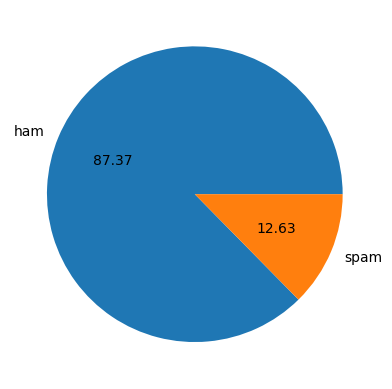

In [ ]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [ ]:
import nltk

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
df['num_char']=df['text'].apply(len)

In [ ]:
df.head()


,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['num_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,text,num_char,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[df['target']==0][['num_char','num_words','num_sentence']].describe()

,num_char,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['target']==1][['num_char','num_words','num_sentence']].describe()

,num_char,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_char', ylabel='Count'>

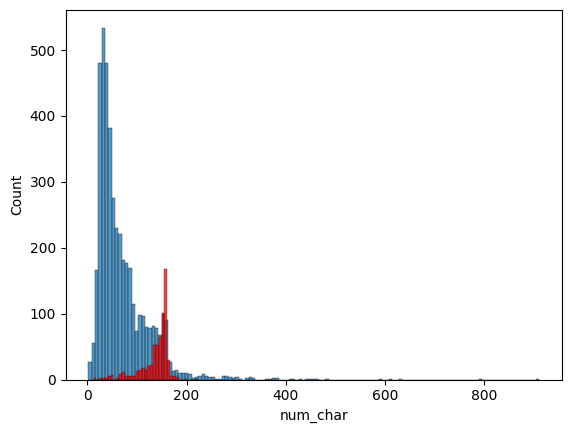

In [ ]:
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='red')

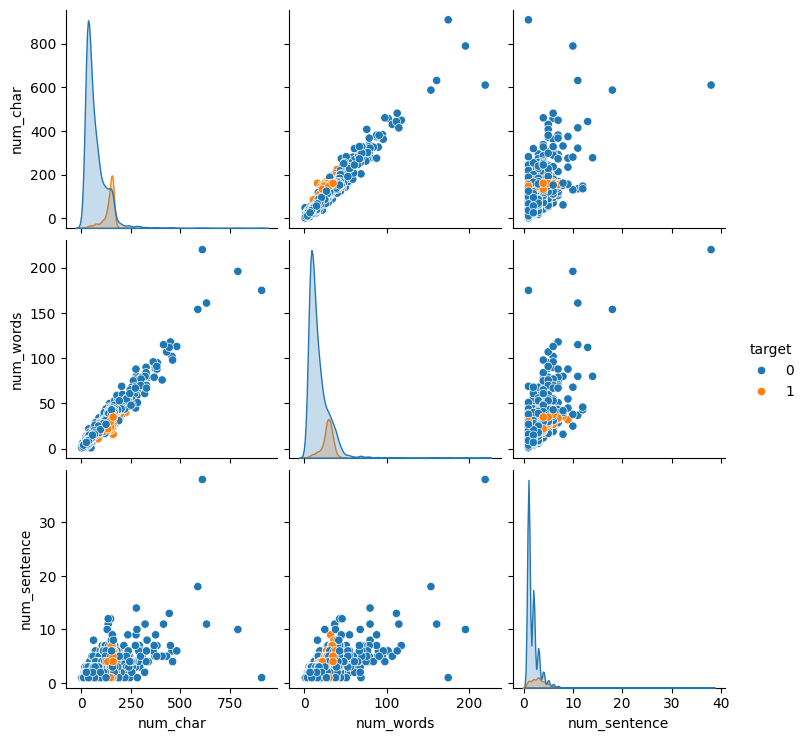

In [ ]:
sns.pairplot(df,hue='target')

<Axes: >

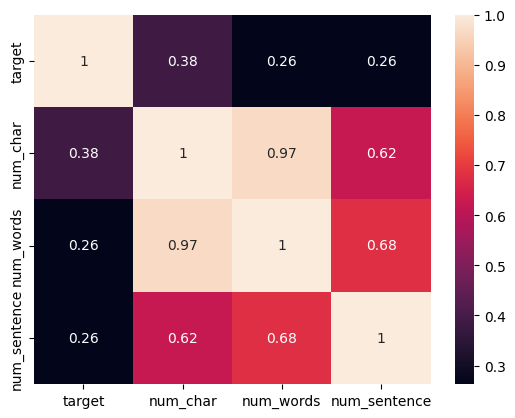

In [ ]:
numerical_features = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True)

In [43]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [46]:
transform_text("i love YT lecture on mAchine learning. what about you? ")


'love yt lectur machin learn'

In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [42]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [50]:
df['tranform_txt']=df['text'].apply(transform_text)

In [51]:
df.head()

,target,text,num_char,num_words,num_sentence,tranform_txt
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [56]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [57]:
spam_wc=wc.generate(df[df['target']==1]['tranform_txt'].str.cat(sep=" "))

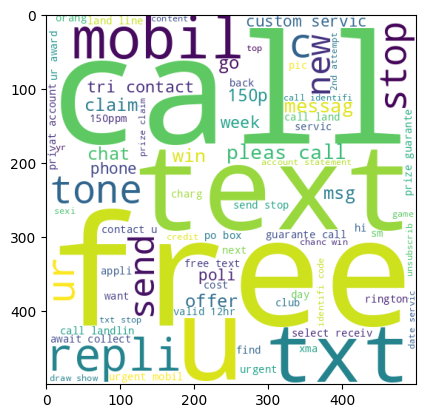

In [58]:
plt.imshow(spam_wc)

In [59]:
ham_wc=wc.generate(df[df['target']==0]['tranform_txt'].str.cat(sep=" "))

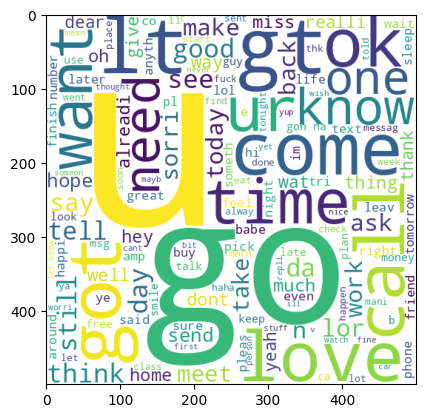

In [61]:
plt.imshow(ham_wc)

In [65]:
spam_corpus=[]
for msg in df[df['target']==1]['tranform_txt'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [66]:
len(spam_corpus)

9939

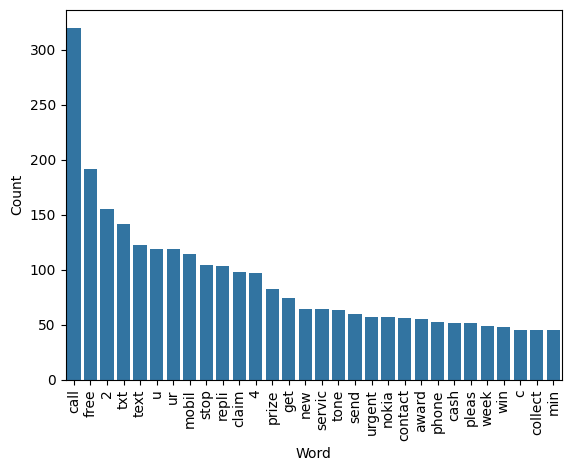

In [71]:
from collections import Counter
word_counts = Counter(spam_corpus).most_common(30)
word_count_df = pd.DataFrame(word_counts, columns=['Word', 'Count'])
sns.barplot(x='Word', y='Count', data=word_count_df)
plt.xticks(rotation=90)
plt.show()

In [75]:
spam_corpus=[]
for msg in df[df['target']==0]['tranform_txt'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [76]:
len(spam_corpus)

35404

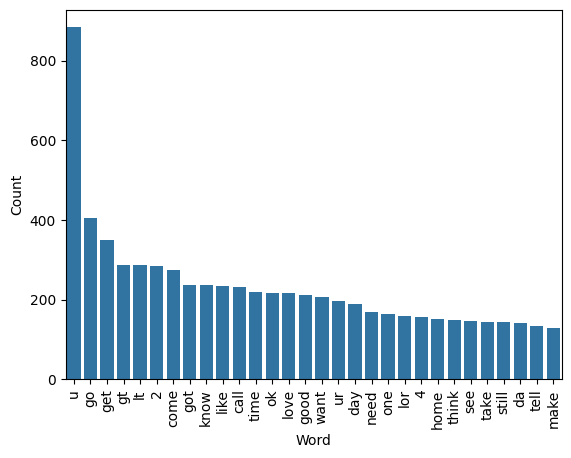

In [77]:
from collections import Counter
word_counts = Counter(spam_corpus).most_common(30)
word_count_df = pd.DataFrame(word_counts, columns=['Word', 'Count'])
sns.barplot(x='Word', y='Count', data=word_count_df)
plt.xticks(rotation=90)
plt.show()

**MODEL** **BUILDING**

In [99]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [107]:
X=tfidf.fit_transform(df['tranform_txt']).toarray()

In [198]:
X=np.hstack((X,df['num_char'].values.reshape(-1,1)))

In [199]:
X.shape

(5169, 3001)

In [200]:
y=df['target'].values



In [201]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [202]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [203]:
from sklearn.model_selection import train_test_split

In [204]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [205]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [206]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [207]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8762088974854932
[[784 112]
 [ 16 122]]
0.5213675213675214


In [208]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9787234042553191
[[889   7]
 [ 15 123]]
0.9461538461538461


In [209]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [210]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [211]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)


In [212]:
clfs={'SVC':svc,
      'KNC':knc,
      'NB':mnb,
      'DT':dtc,
      'LR':lrc,
      'RF':rfc,
      'AB':abc,
      'BC':bc,
      'ETC':etc,
      'GBDT':gbdt,
      'XGB':xgb}


In [213]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)
  return accuracy,precision

In [214]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
  current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
  print(f'{name} accuracy is {current_accuracy}')
  print(f'{name} precision is {current_precision}')
  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)


SVC accuracy is 0.9729206963249516
SVC precision is 0.9435483870967742
KNC accuracy is 0.9168278529980658
KNC precision is 0.9814814814814815
NB accuracy is 0.9787234042553191
NB precision is 0.9461538461538461
DT accuracy is 0.9477756286266924
DT precision is 0.8888888888888888
LR accuracy is 0.9680851063829787
LR precision is 0.9646017699115044
RF accuracy is 0.9729206963249516
RF precision is 0.9824561403508771
AB accuracy is 0.9448742746615088
AB precision is 0.8932038834951457
BC accuracy is 0.960348162475822
BC precision is 0.8646616541353384
ETC accuracy is 0.9806576402321083
ETC precision is 0.9836065573770492
GBDT accuracy is 0.9506769825918762
GBDT precision is 0.9306930693069307
XGB accuracy is 0.9700193423597679
XGB precision is 0.9421487603305785


In [216]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
8,ETC,0.980658,0.983607
5,RF,0.972921,0.982456
1,KNC,0.916828,0.981481
4,LR,0.968085,0.964602
2,NB,0.978723,0.946154
0,SVC,0.972921,0.943548
10,XGB,0.970019,0.942149
9,GBDT,0.950677,0.930693
6,AB,0.944874,0.893204
3,DT,0.947776,0.888889


In [175]:
performance_df1=pd.melt(performance_df,id_vars=['Algorithm'])
performance_df1

,Algorithm,variable,value
0,RF,Accuracy,0.973888
1,KNC,Accuracy,0.905222
2,ETC,Accuracy,0.974855
3,LR,Accuracy,0.967118
4,NB,Accuracy,0.978723
5,SVC,Accuracy,0.970019
6,XGB,Accuracy,0.965184
7,GBDT,Accuracy,0.950677
8,BC,Accuracy,0.958414
9,DT,Accuracy,0.932302


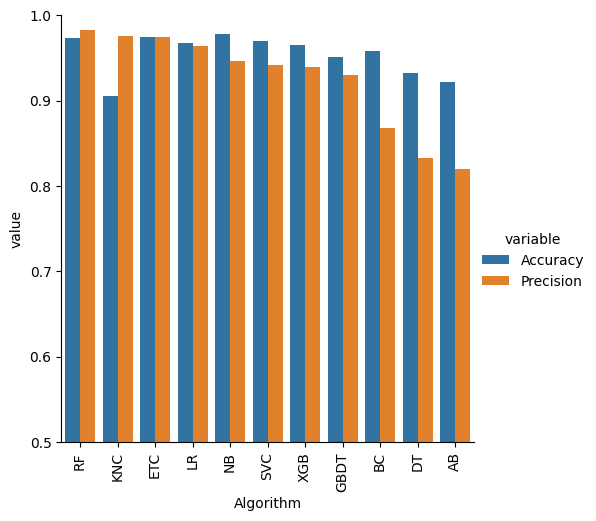

In [217]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [218]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [219]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [220]:
new_df=performance_df.merge(temp_df,on='Algorithm')
new_df_scaled=new_df.merge(temp_df,on='Algorithm')

In [221]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y
0,ETC,0.980658,0.983607,0.980658,0.983607,0.980658,0.983607
1,RF,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456
2,KNC,0.916828,0.981481,0.916828,0.981481,0.916828,0.981481
3,LR,0.968085,0.964602,0.968085,0.964602,0.968085,0.964602
4,NB,0.978723,0.946154,0.978723,0.946154,0.978723,0.946154
5,SVC,0.972921,0.943548,0.972921,0.943548,0.972921,0.943548
6,XGB,0.970019,0.942149,0.970019,0.942149,0.970019,0.942149
7,GBDT,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693
8,AB,0.944874,0.893204,0.944874,0.893204,0.944874,0.893204
9,DT,0.947776,0.888889,0.947776,0.888889,0.947776,0.888889


In [222]:
new_df_scaled = new_df_scaled.rename(
    columns={
        'Accuracy_scaling_x': 'Accuracy_max_ft_3000',
        'Precision_scaling_x': 'Precision_max_ft_3000'
    }
)

In [197]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling_y,Precision_scaling_y
0,RF,0.973888,0.982609,0.973888,0.982609,0.973888,0.982609
1,KNC,0.905222,0.976190,0.905222,0.976190,0.905222,0.976190
2,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
3,LR,0.967118,0.964286,0.967118,0.964286,0.967118,0.964286
4,NB,0.978723,0.946154,0.978723,0.946154,0.978723,0.946154
5,SVC,0.970019,0.942149,0.970019,0.942149,0.970019,0.942149
6,XGB,0.965184,0.939655,0.965184,0.939655,0.965184,0.939655
7,GBDT,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693
8,BC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
9,DT,0.932302,0.833333,0.932302,0.833333,0.932302,0.833333


In [224]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_char':accuracy_scores,'Precision_char':precision_scores}).sort_values('Precision_char',ascending=False)

In [225]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling_y,Precision_scaling_y,Accuracy_char,Precision_char
0,ETC,0.980658,0.983607,0.980658,0.983607,0.980658,0.983607,0.980658,0.983607
1,RF,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456
2,KNC,0.916828,0.981481,0.916828,0.981481,0.916828,0.981481,0.916828,0.981481
3,LR,0.968085,0.964602,0.968085,0.964602,0.968085,0.964602,0.968085,0.964602
4,NB,0.978723,0.946154,0.978723,0.946154,0.978723,0.946154,0.978723,0.946154
5,SVC,0.972921,0.943548,0.972921,0.943548,0.972921,0.943548,0.972921,0.943548
6,XGB,0.970019,0.942149,0.970019,0.942149,0.970019,0.942149,0.970019,0.942149
7,GBDT,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693
8,AB,0.944874,0.893204,0.944874,0.893204,0.944874,0.893204,0.944874,0.893204
9,DT,0.947776,0.888889,0.947776,0.888889,0.947776,0.888889,0.947776,0.888889


In [230]:
#voting classifier
svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
from sklearn.ensemble import VotingClassifier

In [231]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [232]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [233]:
y_pred=voting.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9806576402321083
0.9758064516129032


In [248]:
import pickle

# Save the trained model to a file
with open("spam_classifier.pkl", "wb") as f:
    pickle.dump(voting, f)

In [249]:
email_num_char = len(email[0])

In [250]:
vectorized_email = np.hstack((vectorized_email, np.array([[email_num_char]])))

In [254]:
with open("spam_classifier.pkl", "rb") as f:
    loaded_model = pickle.load(f)
email = ["I am free today,lets go for a movie. what do you say?"]

transformed_email = transform_text(email[0])



vectorized_email = tfidf.transform([transformed_email]).toarray()
email_num_char = len(email[0])
vectorized_email = np.hstack((vectorized_email, np.array([[email_num_char]])))
vectorized_email = scaler.transform(vectorized_email)

prediction = loaded_model.predict(vectorized_email)

print("Spam" if prediction[0] == 1 else "Not Spam")

Not Spam
